In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
veriler = pd.read_csv('Datasets/veriler.csv')

x = veriler.iloc[:,1:4]
y = veriler.iloc[:,4]
X = x.values
Y = y.values

In [3]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=0.33,random_state=0)

In [4]:
dtc = DecisionTreeClassifier(criterion="entropy")
dtc.fit(xTrain,yTrain)
tahmin = dtc.predict(xTest)
confusion_matrix(yTest,tahmin)

array([[1, 0],
       [1, 6]], dtype=int64)

In [5]:
rfc = RandomForestClassifier(n_estimators=10,criterion="gini")
rfc.fit(xTrain,yTrain)
tahmin2 = rfc.predict(xTest)
confusion_matrix(yTest,tahmin2)

array([[1, 0],
       [2, 5]], dtype=int64)

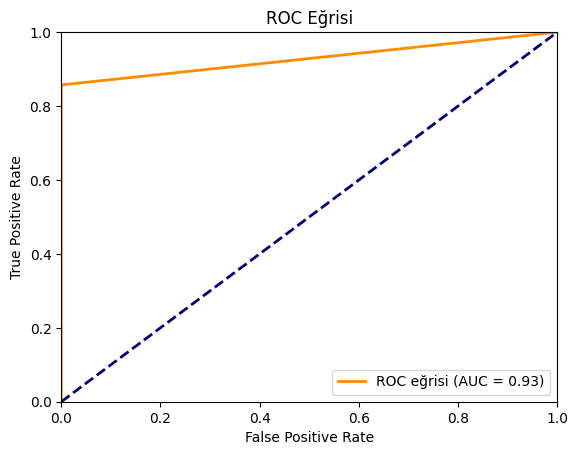

In [14]:
from sklearn.metrics import roc_curve, auc
# Etiketleri sayısal değerlere dönüştürme
le = LabelEncoder()
yTrain_encoded = le.fit_transform(yTrain)
yTest_encoded = le.transform(yTest)

# RandomForestClassifier modeli oluşturma ve eğitme
rfc = RandomForestClassifier(n_estimators=10, criterion="gini")
rfc.fit(xTrain, yTrain_encoded)

# Test verileri üzerinde tahmin yapma (olasılık tahminleri)
tahmin2 = rfc.predict_proba(xTest)[:, 1]
tahmin = dtc.predict_proba(xTest)[:, 1]

# ROC eğrisi hesaplama
fpr, tpr, thresholds = roc_curve(yTest_encoded, tahmin, pos_label=1)
roc_auc = auc(fpr, tpr)

# ROC eğrisini çizme
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC eğrisi (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()